The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [100]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the dataset and find the most common gender and birth country

In [101]:
nobel_winners = pd.read_csv("data/nobel.csv")
top_gender = nobel_winners.sex.mode()
top_country = nobel_winners.birth_country.mode()

### Identify the decade with the highest ratio of US-born winners

In [102]:
# Create a column with a flag for winners whose birth country is "United States of America"
nobel_winners.loc[:, "birth_country_usa"] = nobel_winners["birth_country"] == 'United States of America'

# Create a decade column
nobel_winners["decade"] = (nobel_winners["year"] // 10) * 10

# Find the ratio
total_winners_per_decade = nobel_winners.groupby("decade")["birth_country"].count()
usa_winners_per_decade = nobel_winners.groupby("decade")["birth_country_usa"].sum()
winners_per_decade = pd.concat([total_winners_per_decade, usa_winners_per_decade], axis=1).reset_index()
winners_per_decade["ratio"] = winners_per_decade["birth_country_usa"] / winners_per_decade["birth_country"]
max_decade_usa = winners_per_decade[winners_per_decade["ratio"] == winners_per_decade["ratio"].max()]["decade"].iloc[0]

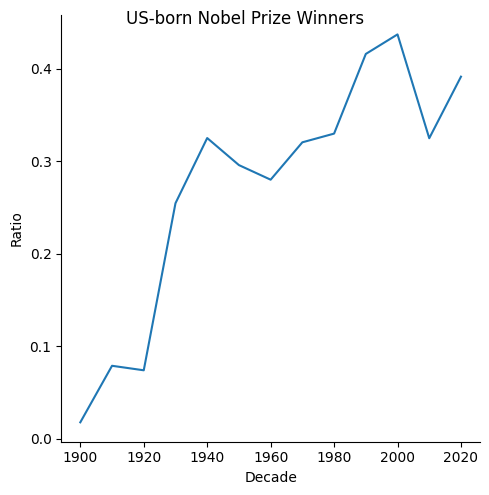

In [103]:
# Create a relational line plot
g = sns.relplot(x="decade", y="ratio", data=winners_per_decade, kind="line")
g.fig.suptitle("US-born Nobel Prize Winners")
g.set(xlabel="Decade", ylabel="Ratio")
plt.show()